# Coleta dos dados do pcap

In [1]:
!pip install scapy
!pip install matplotlib

In [2]:
from scapy.all import rdpcap

# Abre o arquivo pcap e carrega os pacotes
packets = rdpcap('dados.pcap')

# Exibe informações sobre os pacotes capturados
for packet in packets:
    print(packet.summary())

Ether / IP / ICMP 10.0.0.1 > 10.0.0.3 echo-request 0 / Raw
Ether / IP / ICMP 10.0.0.3 > 10.0.0.1 echo-reply 0 / Raw
Ether / IP / ICMP 10.0.0.1 > 10.0.0.3 echo-request 0 / Raw
Ether / IP / ICMP 10.0.0.3 > 10.0.0.1 echo-reply 0 / Raw
Ether / IP / ICMP 10.0.0.1 > 10.0.0.3 echo-request 0 / Raw
Ether / IP / ICMP 10.0.0.3 > 10.0.0.1 echo-reply 0 / Raw
Ether / IP / ICMP 10.0.0.1 > 10.0.0.3 echo-request 0 / Raw
Ether / IP / ICMP 10.0.0.3 > 10.0.0.1 echo-reply 0 / Raw
Ether / IP / ICMP 10.0.0.1 > 10.0.0.3 echo-request 0 / Raw
Ether / IP / ICMP 10.0.0.3 > 10.0.0.1 echo-reply 0 / Raw
Ether / IP / ICMP 10.0.0.1 > 10.0.0.3 echo-request 0 / Raw
Ether / IP / ICMP 10.0.0.3 > 10.0.0.1 echo-reply 0 / Raw
Ether / IP / ICMP 10.0.0.1 > 10.0.0.3 echo-request 0 / Raw
Ether / IP / ICMP 10.0.0.3 > 10.0.0.1 echo-reply 0 / Raw
Ether / IP / ICMP 10.0.0.1 > 10.0.0.3 echo-request 0 / Raw
Ether / IP / ICMP 10.0.0.3 > 10.0.0.1 echo-reply 0 / Raw
Ether / IP / ICMP 10.0.0.1 > 10.0.0.3 echo-request 0 / Raw
Ether / IP / 

Encontrar os endereços de origem e destino no arquivo sem repetir

In [3]:
from scapy.layers.inet import IP

# Lista os endereços IP de origem e destino sem repetições
seen_ips = set()
for packet in packets:
    if IP in packet:
        src, dst = packet[IP].src, packet[IP].dst
        if (src, dst) not in seen_ips:
            print(f"Origem: {src}, Destino: {dst}")
            seen_ips.add((src, dst))

Origem: 10.0.0.1, Destino: 10.0.0.3
Origem: 10.0.0.3, Destino: 10.0.0.1
Origem: 10.0.0.2, Destino: 10.0.0.4
Origem: 10.0.0.4, Destino: 10.0.0.2


Gráficos do intervalo entre pacotes

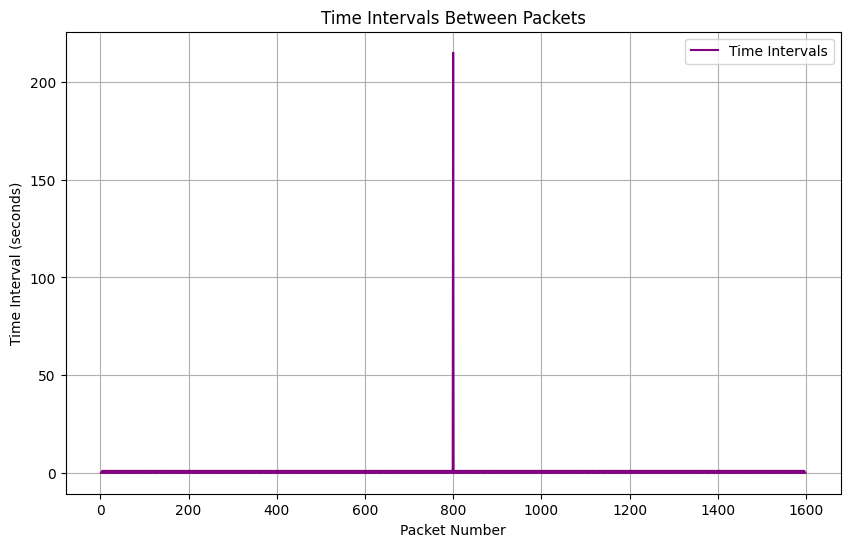

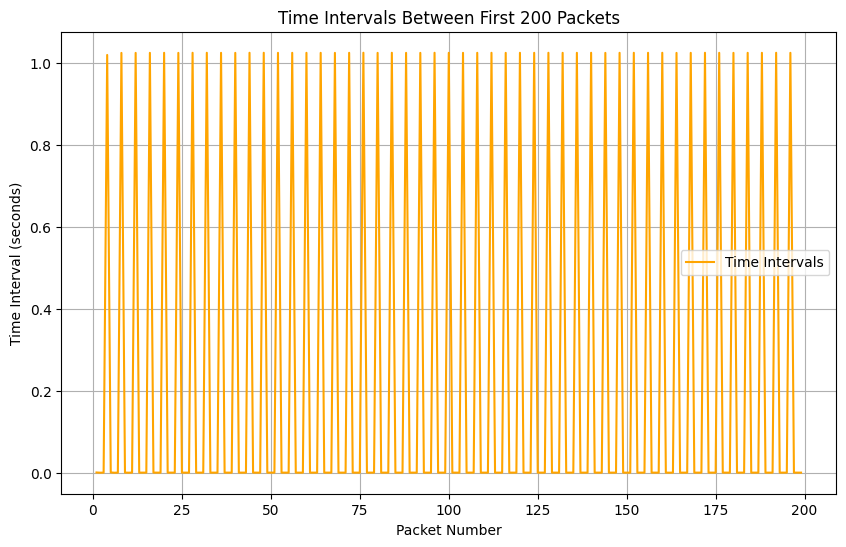

Intervalos dos primeiros 10 pacotes:
Pacote 1 -> Pacote 2: 0.000417 segundos
Pacote 2 -> Pacote 3: -0.000136 segundos
Pacote 3 -> Pacote 4: 0.000008 segundos
Pacote 4 -> Pacote 5: 1.018746 segundos
Pacote 5 -> Pacote 6: 0.000542 segundos
Pacote 6 -> Pacote 7: -0.000184 segundos
Pacote 7 -> Pacote 8: 0.000040 segundos
Pacote 8 -> Pacote 9: 1.023723 segundos
Pacote 9 -> Pacote 10: 0.000119 segundos
Pacote 10 -> Pacote 11: -0.000098 segundos

Pacote 1: Ether / IP / ICMP 10.0.0.1 > 10.0.0.3 echo-request 0 / Raw
  Origem: 10.0.0.1, Destino: 10.0.0.3
Pacote 2: Ether / IP / ICMP 10.0.0.3 > 10.0.0.1 echo-reply 0 / Raw
  Origem: 10.0.0.3, Destino: 10.0.0.1
Pacote 3: Ether / IP / ICMP 10.0.0.1 > 10.0.0.3 echo-request 0 / Raw
  Origem: 10.0.0.1, Destino: 10.0.0.3
Pacote 4: Ether / IP / ICMP 10.0.0.3 > 10.0.0.1 echo-reply 0 / Raw
  Origem: 10.0.0.3, Destino: 10.0.0.1
Pacote 5: Ether / IP / ICMP 10.0.0.1 > 10.0.0.3 echo-request 0 / Raw
  Origem: 10.0.0.1, Destino: 10.0.0.3
Pacote 6: Ether / IP / IC

In [4]:
import matplotlib.pyplot as plt

# computa os intervalos entre os pacotes
time_intervals = [packets[i + 1].time - packets[i].time for i in range(len(packets) - 1)]
# mostra um grafico de linha, para cada pacote, o tempo que levou do pacote anterior até o atual
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(time_intervals) + 1), time_intervals, label='Time Intervals', color='purple')
plt.xlabel('Packet Number')
plt.ylabel('Time Interval (seconds)')
plt.title('Time Intervals Between Packets')
plt.legend()
plt.grid()
plt.show()

# agora só os primeiros 200 pacotes
first_packets = packets[:200]
# Gráfico de intervalo entre pacotes
first_time_intervals = [first_packets[i + 1].time - first_packets[i].time for i in range(len(first_packets) - 1)]
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(first_time_intervals) + 1), first_time_intervals, label='Time Intervals', color='orange')
plt.xlabel('Packet Number')
plt.ylabel('Time Interval (seconds)')
plt.title('Time Intervals Between First 200 Packets')
plt.legend()
plt.grid()
plt.show()

# Printando os intervalos dos primeiros 10 pacotes
print("Intervalos dos primeiros 10 pacotes:")
for i in range(10):
    if i < len(first_time_intervals):
        print(f"Pacote {i + 1} -> Pacote {i + 2}: {first_time_intervals[i]:.6f} segundos")
    else:
        print(f"Pacote {i + 1} -> Pacote {i + 2}: Intervalo não disponível")
print()

# Mostra os pacotes
for i, packet in enumerate(first_packets[:10]):
    print(f"Pacote {i + 1}: {packet.summary()}")
    if IP in packet:
        print(f"  Origem: {packet[IP].src}, Destino: {packet[IP].dst}")
    else:
        print("  Não é um pacote IP")

Calcular o throughput (taxa de transferência) médio

In [5]:
# Calcula o tamanho total dos pacotes e o tempo total de captura
total_size = sum(len(packet) for packet in packets)
start_time = packets[0].time
end_time = packets[-1].time
duration = end_time - start_time

# Calcula o throughput médio
if duration > 0:
    throughput = total_size / duration  # bytes por segundo
    print(f"Throughput médio: {throughput:.2f} bytes/segundo")
else:
    print("Duração da captura é zero, não é possível calcular o throughput.")

Throughput médio: 251.83 bytes/segundo


Intervalo médio entre pacotes (tempo entre chegadas de pacotes).

In [6]:
# Calcula o intervalo médio entre pacotes
if len(packets) > 1:
    avg_interval = sum(time_intervals) / len(time_intervals)
    print(f"Intervalo médio entre pacotes: {avg_interval:.6f} segundos")
else:
    print("Não há pacotes suficientes para calcular o intervalo médio.")

Intervalo médio entre pacotes: 0.389400 segundos


Gráfico do intervalo filtrado entre pacotes

Intervalos calculados pulando de 4 em 4:
[Decimal('1.019035'), Decimal('1.024121'), Decimal('1.023872'), Decimal('1.023933'), Decimal('1.024072'), Decimal('1.023845'), Decimal('1.024060'), Decimal('1.024094'), Decimal('1.023962'), Decimal('1.023874'), Decimal('1.024118'), Decimal('1.024121'), Decimal('1.023963'), Decimal('1.023996'), Decimal('1.023975'), Decimal('1.023951'), Decimal('1.023876'), Decimal('1.024006'), Decimal('1.024205'), Decimal('1.023873'), Decimal('1.024119'), Decimal('1.023917'), Decimal('1.023889'), Decimal('1.024097'), Decimal('1.023962'), Decimal('1.023977'), Decimal('1.024025'), Decimal('1.024037'), Decimal('1.023885'), Decimal('1.024062'), Decimal('1.023994'), Decimal('1.024081'), Decimal('1.023950'), Decimal('1.024011'), Decimal('1.024114'), Decimal('1.023837'), Decimal('1.023997'), Decimal('1.024074'), Decimal('1.024021'), Decimal('1.024097'), Decimal('1.023852'), Decimal('1.023932'), Decimal('1.024122'), Decimal('1.023990'), Decimal('1.023925'), Decimal('1.02

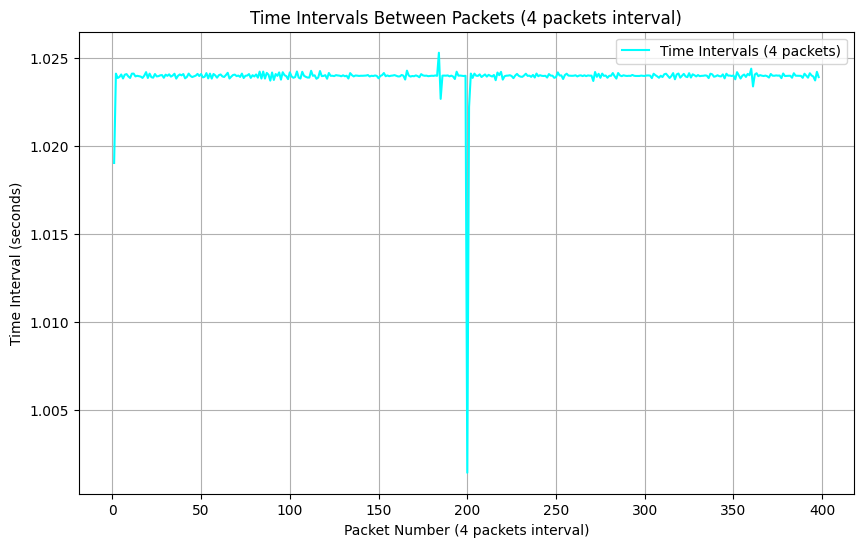

In [7]:
# Normaliza o tempo em relação ao início
time_stamps = [packet.time - start_time for packet in packets]
# Calculo médio do tempo entre pacotes pulando de 4 em 4
intervals_4 = [time_stamps[i] - time_stamps[i - 4] for i in range(4, len(time_stamps), 4)]
# Remove intervalos maiores que 200
intervals_4 = [interval for interval in intervals_4 if interval <= 200]
print("Intervalos calculados pulando de 4 em 4:")
print(intervals_4)
# Computa a média dos intervalos calculados
if intervals_4:
    avg_interval_4 = sum(intervals_4) / len(intervals_4)
    print(f"Média dos intervalos pulando de 4 em 4: {avg_interval_4:.6f} segundos")
else:
    print("Não há intervalos suficientes para calcular a média.")
# Gráfico de intervalo médio entre pacotes pulando de 4 em 4
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(intervals_4) + 1), intervals_4, label='Time Intervals (4 packets)', color='cyan')
plt.xlabel('Packet Number (4 packets interval)')
plt.ylabel('Time Interval (seconds)')
plt.title('Time Intervals Between Packets (4 packets interval)')
plt.legend()
plt.grid()
plt.show()

Contagem de pacotes (total de pacotes)

In [8]:
# Contagem total de pacotes
total_packets = len(packets)
print(f"Total de pacotes: {total_packets}")

Total de pacotes: 1600


Gráficos ilustrativos mostrando claramente as métricas obtidas

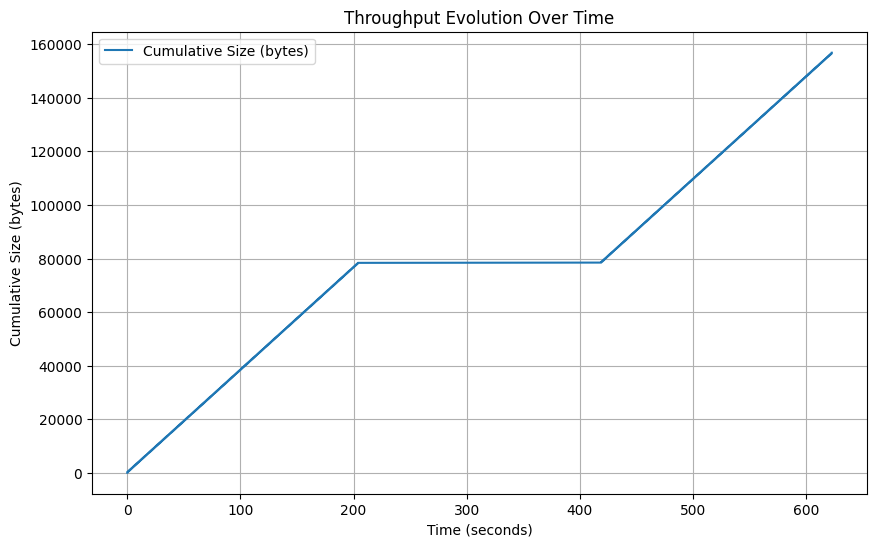

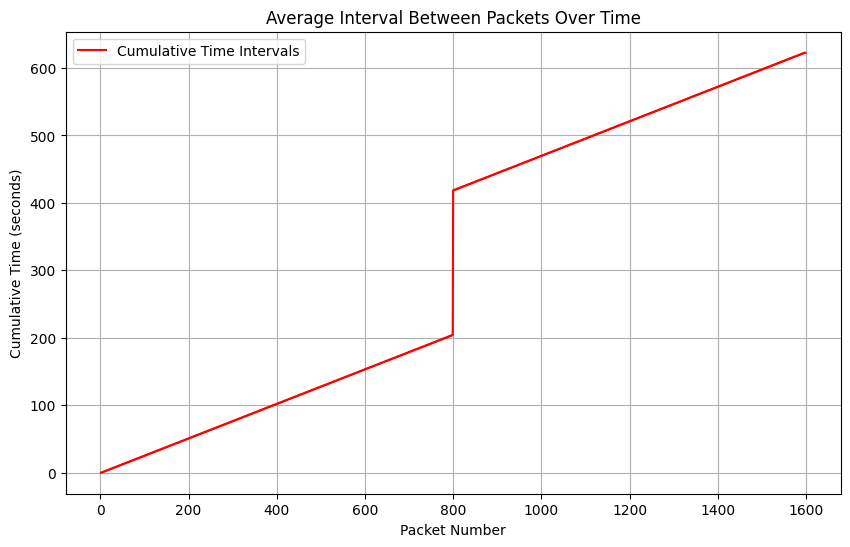

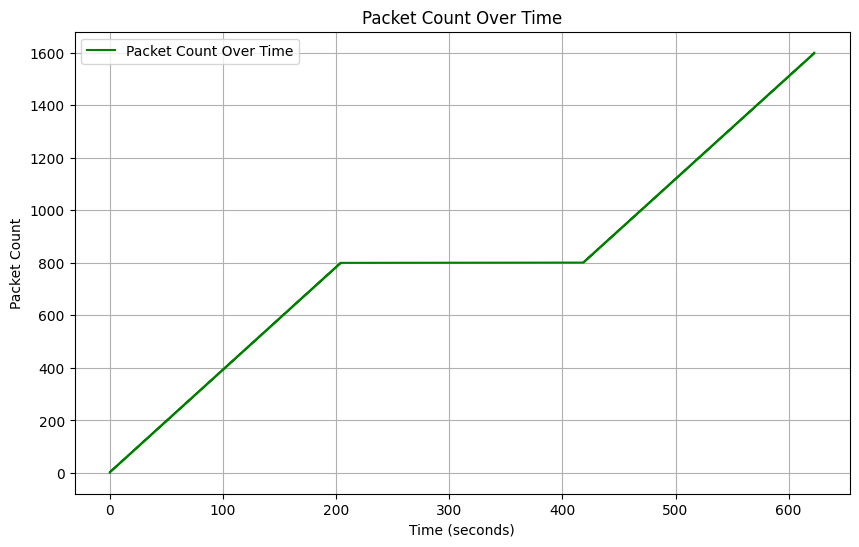

In [9]:
# Gráfico de throughput ao longo do tempo
packet_sizes = [len(packet) for packet in packets]
cumulative_size = [sum(packet_sizes[:i+1]) for i in range(len(packet_sizes))]

plt.figure(figsize=(10, 6))
plt.plot(time_stamps, cumulative_size, label='Cumulative Size (bytes)')
plt.xlabel('Time (seconds)')
plt.ylabel('Cumulative Size (bytes)')
plt.title('Throughput Evolution Over Time')
plt.legend()
plt.grid()
plt.show()

# Gráfico de intervalo médio entre pacotes
if len(time_intervals) > 0:
    cumulative_intervals = [sum(time_intervals[:i+1]) for i in range(len(time_intervals))]
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(cumulative_intervals) + 1), cumulative_intervals, label='Cumulative Time Intervals', color='red')
    plt.xlabel('Packet Number')
    plt.ylabel('Cumulative Time (seconds)')
    plt.title('Average Interval Between Packets Over Time')
    plt.legend()
    plt.grid()
    plt.show()

    # Gráfico de número de pacotes por tempo
    plt.figure(figsize=(10, 6))
    plt.plot(time_stamps, range(1, len(time_stamps) + 1), label='Packet Count Over Time', color='green')
    plt.xlabel('Time (seconds)')
    plt.ylabel('Packet Count')
    plt.title('Packet Count Over Time')
    plt.legend()
    plt.grid()
    plt.show()